In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arunrk7_surface_crack_detection_path = kagglehub.dataset_download('arunrk7/surface-crack-detection')

print('Data source import complete.')


100%|██████████| 233M/233M [00:02<00:00, 112MB/s]

Extracting files...


Data source import complete.



<font color = 'blue'>
Content:

1. [Load Dataset](#1)
1. [Visualizing the Dataset](#2)
1. [Normalization of image data](#3)
1. [Convolutional Neural Network (CNN) Model](#4)
    * [Model Training](#5)
    * [Accuracy and Loss Graphs](#6)
    * [Classification Report](#7)  
1. [Result](#8)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
#from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam, RMSprop, Adagrad
#from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<a id = "1"></a><br>
# Load Dataset

In [3]:
labels = ['Negative', 'Positive']
img_size = 254
def read_images(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data,dtype=object)

Dataset = read_images(arunrk7_surface_crack_detection_path)

<a id = "2"></a><br>
# Visualizing the Dataset

Text(0.5, 1.0, 'Number of Images')

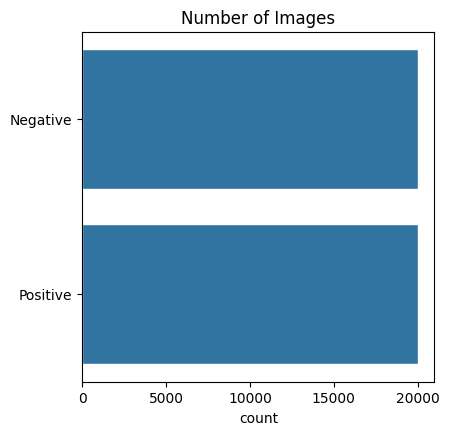

In [4]:
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

<a id = "3"></a><br>
# Normalization of image data

In [5]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 253.5, 253.5, -0.5)

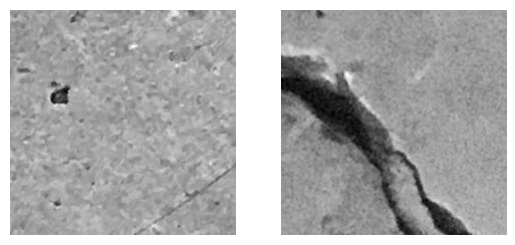

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

<a id = "4"></a><br>
# CNN Model


Convolutional neural networks (CNN) are a neural network method that can include multiple arrays created to process 2-dimensional arrays of three color components (Lecun et al., 2010). In images, edges called local features form patterns and these patterns combine into pieces, then pieces form objects (Bengio & Lecun, 1997). These properties are obtained in the convolution layer and these properties are brought into a format that can be semantically combined and processed in the pooling layer.


CNN; It is a type of algorithm that consists of an input, an output, and many hidden layers. The hidden layer includes convolution layer, pooling layer, rectified linear unit layer (ReLu), fully connected layer and classification sections (Lecun et al., 2010).

* **Convolution layer** is used in convolutional neural networks to perform convolution process in multi-dimensional processes. This layer enables the adjustment of the neurons in the image matrix, which is defined as the input called feature map, and enables the learning of the properties.

* **ReLu** fulfills the task of flattening the feature map that emerges after the convolution process. By converting negative values to zero, it produces output between zero and positive infinite values.

* **Pooling layer** performs the size reduction operation by performing the function operation defined as subsampling (Kalchbrenner et al., 2014). In addition, thanks to this layer, excessive memorization is prevented.

Regularization in the training phase in CNN. Data augmentation is an important element for regularization of weights and batch normalization (Srivastava et al., 2014). For this reason, the method called Dropout is used. Its main purpose is to *prevent overfitting*.

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(64, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(128, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(2, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 127, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,603,266 (120.56 MB)

 Trainable params: 31,602,754 (120.55 MB)

 Non-trainable params: 512 (2.00 KB)

<a id = "5"></a><br>
# **Model Training**

* Accuracy can be increased by increasing the number of epochs.
* Learning rate is also important here. Better results can be achieved by training at different learning rates. The best learning rate can be found by trying. Or grid search method can be used. But this increases the training time considerably.

If a low learning rate is selected; the training speed slows down, if the high learning rate is selected; the training will speed up, but the accuracy will decrease.

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x, y, epochs = 15, batch_size = 128, validation_split = 0.25, verbose=1)

In [ ]:
print(history.history.keys())
model.save("baane_extralu.h5")

<a id = "6"></a><br>
# **Graphs**

In [ ]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

<a id = "7"></a><br>
# Classification Report

* The classification_report function builds a text report showing the main classification metrics.

* **Precision** for each class, it is defined as the ratio of true positives to the sum of true and false positives.

* **Recall** for each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.
* **F1 scores** are lower than accuracy measures as they embed precision and recall into their computation.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y, predictions, target_names = ['Negative','Positive']))

<a id = "8"></a><br>
# Result

* As a result, 99% success has been achieved.
* The accuracy and loss function can change by changing the learning rates or changing the number of epoch.


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F12C3B;
           font-size:200%;
           font-family:Cambria;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">Thank you
</p>
</div>